In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import swan_vis as swan


p = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
gtf = '../cerberus.gtf'
annot = '../../../refs/cerberus/v40_cerberus.gtf'
ab = '../cerberus_filtered_abundance.tsv'
gene_ab = '../../talon/human_talon_abundance.tsv'
meta = '../../swan/swan_metadata.tsv'
h5 = '../cerberus_annot.h5'

In [3]:
# sg = swan.SwanGraph()
# sg.add_annotation(annot)
# sg.add_transcriptome(gtf, include_isms=True)
# sg.add_abundance(ab)
# sg.add_abundance(gene_ab, how='gene')

# # add metadata and add colors
# sg.add_metadata(meta)
# c_dict, order = get_biosample_colors()
# sg.set_metadata_colors('sample', c_dict)
# c_dict, order = get_ad_colors()
# sg.set_metadata_colors('health_status', c_dict)

## Swan reports

In [4]:
def make_reports(sg, gname):
    opref = 'figures/{}'.format(gname.lower())
    sg.gen_report(gname,
              prefix=opref,
              layer='pi',
              cmap='magma',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              browser=True)

    sg.gen_report(gname,
                  prefix=opref,
                  layer='tpm',
                  cmap='viridis',
                  novelty=True,
                  groupby='sample',
                  transcript_col='tname',
                  metadata_cols=['sample'],
                  indicate_novel=True)
    

In [5]:
sg = swan.read('swan.p')

Read in graph from swan.p


In [6]:
make_reports(sg, 'ZMIZ1')


Plotting transcripts for ENSG00000108175
Saving transcript path graph for ENSG00000108175[7,8,1] as figures/zmiz1_browser_ENSG00000108175[7,8,1]_path.png
Saving transcript path graph for ENSG00000108175[7,8,14] as figures/zmiz1_browser_ENSG00000108175[7,8,14]_path.png
Saving transcript path graph for ENSG00000108175[1,1,1] as figures/zmiz1_browser_ENSG00000108175[1,1,1]_path.png
Saving transcript path graph for ENSG00000108175[6,6,14] as figures/zmiz1_browser_ENSG00000108175[6,6,14]_path.png
Saving transcript path graph for ENSG00000108175[6,6,1] as figures/zmiz1_browser_ENSG00000108175[6,6,1]_path.png
Saving transcript path graph for ENSG00000108175[1,1,14] as figures/zmiz1_browser_ENSG00000108175[1,1,14]_path.png
Saving transcript path graph for ENSG00000108175[6,7,1] as figures/zmiz1_browser_ENSG00000108175[6,7,1]_path.png
Saving transcript path graph for ENSG00000108175[7,8,13] as figures/zmiz1_browser_ENSG00000108175[7,8,13]_path.png
Generating report for ENSG00000108175

Plottin

In [7]:
gnames = ['TCF4', 'TCF12', 'CTCF', 'MEF2D', 'MEF2A']
for g in gnames:
    make_reports(sg, g)


Plotting transcripts for ENSG00000196628
Saving transcript path graph for ENSG00000196628[5,5,3] as figures/tcf4_browser_ENSG00000196628[5,5,3]_path.png
Saving transcript path graph for ENSG00000196628[4,6,2] as figures/tcf4_browser_ENSG00000196628[4,6,2]_path.png
Saving transcript path graph for ENSG00000196628[1,1,2] as figures/tcf4_browser_ENSG00000196628[1,1,2]_path.png
Saving transcript path graph for ENSG00000196628[2,2,2] as figures/tcf4_browser_ENSG00000196628[2,2,2]_path.png
Saving transcript path graph for ENSG00000196628[2,98,3] as figures/tcf4_browser_ENSG00000196628[2,98,3]_path.png
Saving transcript path graph for ENSG00000196628[18,22,1] as figures/tcf4_browser_ENSG00000196628[18,22,1]_path.png
Saving transcript path graph for ENSG00000196628[2,29,3] as figures/tcf4_browser_ENSG00000196628[2,29,3]_path.png
Saving transcript path graph for ENSG00000196628[8,94,3] as figures/tcf4_browser_ENSG00000196628[8,94,3]_path.png
Saving transcript path graph for ENSG00000196628[8,9

In [12]:
sg = swan.read('swan.p')
datasets = []
datasets += sg.adata.obs.loc[sg.adata.obs['sample'].str.contains('h9'), 'sample'].unique().tolist()
datasets += sg.adata.obs.loc[sg.adata.obs['sample'].str.contains('pgp1'), 'sample'].unique().tolist()
datasets.append('caco2')
datasets.append('muscle')

print(datasets)

sg.gen_report('MEF2C',
              prefix='figures/mef2c_h9_pgp1_caco2',
              layer='pi',
              cmap='magma',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              datasets={'sample': datasets},
              browser=True)

sg.gen_report('MEF2C',
              prefix='figures/mef2c_h9_pgp1_caco2',
              layer='tpm',
              cmap='viridis',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              indicate_novel=True,
              datasets={'sample': datasets})


Read in graph from swan.p
['h9_de', 'h9_panc_progen', 'h9_neural_crest', 'h9', 'h9_chondro', 'h9_osteocyte', 'h9_panc_beta', 'pgp1_astro', 'pgp1', 'pgp1_endo', 'pgp1_excite_neuron', 'caco2', 'muscle']

Plotting transcripts for ENSG00000081189
Saving transcript path graph for ENSG00000081189[1,10,5] as figures/mef2c_h9_pgp1_caco2_browser_ENSG00000081189[1,10,5]_path.png
Saving transcript path graph for ENSG00000081189[1,13,8] as figures/mef2c_h9_pgp1_caco2_browser_ENSG00000081189[1,13,8]_path.png
Saving transcript path graph for ENSG00000081189[1,64,4] as figures/mef2c_h9_pgp1_caco2_browser_ENSG00000081189[1,64,4]_path.png
Saving transcript path graph for ENSG00000081189[1,62,4] as figures/mef2c_h9_pgp1_caco2_browser_ENSG00000081189[1,62,4]_path.png
Saving transcript path graph for ENSG00000081189[1,43,20] as figures/mef2c_h9_pgp1_caco2_browser_ENSG00000081189[1,43,20]_path.png
Saving transcript path graph for ENSG00000081189[1,64,5] as figures/mef2c_h9_pgp1_caco2_browser_ENSG0000008118

In [2]:
# bin1
sg = swan.read('swan.p')

gene = 'BIN1'
opref = 'figures/{}'.format(gene)
conds = sg.adata.obs.loc[sg.adata.obs['sample'].str.contains('pgp1'), 'sample'].unique().tolist()
conds = ['pgp1', 'pgp1_astro', 'pgp1_endo', 'pgp1_excite_neuron']
sg.gen_report(gene,
          prefix=opref,
          layer='pi',
          order='pi',
          cmap='magma',
          novelty=True,
          metadata_cols=['sample'],
          groupby='sample',
          datasets={'sample': conds},
          transcript_col='tname',
          display_numbers=True,
          browser=True)

Read in graph from swan.p

Plotting transcripts for ENSG00000136717.14
Saving transcript path graph for ENSG00000136717[1,2,1] as figures/BIN1_browser_ENSG00000136717[1,2,1]_path.png
Saving transcript path graph for ENSG00000136717[2,2,1] as figures/BIN1_browser_ENSG00000136717[2,2,1]_path.png
Saving transcript path graph for ENSG00000136717[1,4,1] as figures/BIN1_browser_ENSG00000136717[1,4,1]_path.png
Saving transcript path graph for ENSG00000136717[2,1,1] as figures/BIN1_browser_ENSG00000136717[2,1,1]_path.png
Saving transcript path graph for ENSG00000136717[1,1,1] as figures/BIN1_browser_ENSG00000136717[1,1,1]_path.png
Saving transcript path graph for ENSG00000136717[1,20,1] as figures/BIN1_browser_ENSG00000136717[1,20,1]_path.png
Saving transcript path graph for ENSG00000136717[4,15,1] as figures/BIN1_browser_ENSG00000136717[4,15,1]_path.png
Saving transcript path graph for ENSG00000136717[1,18,1] as figures/BIN1_browser_ENSG00000136717[1,18,1]_path.png
Saving transcript path grap

In [3]:
sg = swan.read('swan.p')
sg.gen_report('SOX9',
              prefix='figures/sox9',
              layer='tpm',
              cmap='viridis',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              indicate_novel=True)
sg.gen_report('SOX9',
              prefix='figures/sox9',
              layer='pi',
              cmap='magma',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              browser=True)

Read in graph from swan.p

Plotting transcripts for ENSG00000125398.6
Saving transcript path graph for ENSG00000125398[1,1,1] as figures/sox9_novel_ENSG00000125398[1,1,1]_path.png
Saving transcript path graph for ENSG00000125398[2,2,1] as figures/sox9_novel_ENSG00000125398[2,2,1]_path.png
Saving transcript path graph for ENSG00000125398[3,2,1] as figures/sox9_novel_ENSG00000125398[3,2,1]_path.png
Generating report for ENSG00000125398.6

Plotting transcripts for ENSG00000125398.6
Saving transcript path graph for ENSG00000125398[1,1,1] as figures/sox9_browser_ENSG00000125398[1,1,1]_path.png
Saving transcript path graph for ENSG00000125398[2,2,1] as figures/sox9_browser_ENSG00000125398[2,2,1]_path.png
Saving transcript path graph for ENSG00000125398[3,2,1] as figures/sox9_browser_ENSG00000125398[3,2,1]_path.png
Generating report for ENSG00000125398.6


In [16]:
gname = 'KATNAL1'
sg = swan.read('swan.p')
sg.gen_report(gname,
              prefix='figures/{}'.format(gname.lower()),
              layer='tpm',
              cmap='viridis',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              indicate_novel=True)
sg.gen_report(gname,
              prefix='figures/{}'.format(gname.lower()),
              layer='pi',
              cmap='magma',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              browser=True)

Read in graph from swan.p

Plotting transcripts for ENSG00000102781.13
Saving transcript path graph for ENSG00000102781[1,1,1] as figures/katnal1_novel_ENSG00000102781[1,1,1]_path.png
Saving transcript path graph for ENSG00000102781[2,2,2] as figures/katnal1_novel_ENSG00000102781[2,2,2]_path.png
Saving transcript path graph for ENSG00000102781[1,1,2] as figures/katnal1_novel_ENSG00000102781[1,1,2]_path.png
Saving transcript path graph for ENSG00000102781[2,6,6] as figures/katnal1_novel_ENSG00000102781[2,6,6]_path.png
Saving transcript path graph for ENSG00000102781[1,1,5] as figures/katnal1_novel_ENSG00000102781[1,1,5]_path.png
Saving transcript path graph for ENSG00000102781[2,2,5] as figures/katnal1_novel_ENSG00000102781[2,2,5]_path.png
Saving transcript path graph for ENSG00000102781[2,6,2] as figures/katnal1_novel_ENSG00000102781[2,6,2]_path.png
Saving transcript path graph for ENSG00000102781[4,6,5] as figures/katnal1_novel_ENSG00000102781[4,6,5]_path.png
Saving transcript path gr

In [15]:
sg = swan.read('swan.p')
sg.gen_report('KMT2A',
              prefix='figures/kmt2a',
              layer='tpm',
              cmap='viridis',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              indicate_novel=True)
sg.gen_report('KMT2A',
              prefix='figures/kmt2a',
              layer='pi',
              cmap='magma',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              browser=True)

Read in graph from swan.p

Plotting transcripts for ENSG00000118058.21
Saving transcript path graph for ENSG00000118058[3,9,6] as figures/kmt2a_novel_ENSG00000118058[3,9,6]_path.png
Saving transcript path graph for ENSG00000118058[21,3,2] as figures/kmt2a_novel_ENSG00000118058[21,3,2]_path.png
Saving transcript path graph for ENSG00000118058[4,14,8] as figures/kmt2a_novel_ENSG00000118058[4,14,8]_path.png
Saving transcript path graph for ENSG00000118058[20,33,4] as figures/kmt2a_novel_ENSG00000118058[20,33,4]_path.png
Saving transcript path graph for ENSG00000118058[1,9,6] as figures/kmt2a_novel_ENSG00000118058[1,9,6]_path.png
Saving transcript path graph for ENSG00000118058[18,31,24] as figures/kmt2a_novel_ENSG00000118058[18,31,24]_path.png
Saving transcript path graph for ENSG00000118058[21,8,27] as figures/kmt2a_novel_ENSG00000118058[21,8,27]_path.png
Saving transcript path graph for ENSG00000118058[1,3,2] as figures/kmt2a_novel_ENSG00000118058[1,3,2]_path.png
Saving transcript path 

In [13]:
# sg = swan.read('220809_swan.p')
sg.gen_report('CTCF',
              prefix='figures/ctcf',
              layer='pi',
              cmap='magma',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              browser=True)

sg.gen_report('CTCF',
              prefix='figures/ctcf',
              layer='tpm',
              cmap='viridis',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              indicate_novel=True)

Read in graph from 220809_swan.p

Plotting transcripts for ENSG00000102974
Saving transcript path graph for ENSG00000102974[1,1,1] as figures/ctcf_browser_ENSG00000102974[1,1,1]_path.png
Saving transcript path graph for ENSG00000102974[3,5,1] as figures/ctcf_browser_ENSG00000102974[3,5,1]_path.png
Saving transcript path graph for ENSG00000102974[1,6,1] as figures/ctcf_browser_ENSG00000102974[1,6,1]_path.png
Saving transcript path graph for ENSG00000102974[9,16,1] as figures/ctcf_browser_ENSG00000102974[9,16,1]_path.png
Saving transcript path graph for ENSG00000102974[10,17,1] as figures/ctcf_browser_ENSG00000102974[10,17,1]_path.png
Saving transcript path graph for ENSG00000102974[2,4,1] as figures/ctcf_browser_ENSG00000102974[2,4,1]_path.png
Saving transcript path graph for ENSG00000102974[1,7,1] as figures/ctcf_browser_ENSG00000102974[1,7,1]_path.png
Saving transcript path graph for ENSG00000102974[12,16,1] as figures/ctcf_browser_ENSG00000102974[12,16,1]_path.png
Saving transcript p

## Major isoforms
How many isoforms does it take to get 90% expression / gene / sample?

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import swan_vis as swan


p = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

gtf = '../cerberus.gtf'
annot = '../../../refs/cerberus/v40_cerberus.gtf'
filt_ab = '../cerberus_filtered_abundance.tsv'
gene_ab = '../../talon/human_talon_abundance.tsv'
meta = '../../swan/swan_metadata.tsv'
h5 = '../cerberus_annot.h5'

In [7]:
sg = swan.read('swan.p')
t_df = pd.read_csv(filt_ab, sep='\t')

Read in graph from swan.p


In [8]:
tpm_df, tids = get_tpm_table(t_df,
               how='iso',
               min_tpm=1,
               gene_subset='polya',
               h5=h5)

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1599: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1598: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 234040
# isos >= 1 tpm: 212911
Applying gene type and novelty subset
Number of isos reported: 209476


In [9]:
def get_major_isos(sg, t_df, 
                   obs_col,
                   ofile,
                   min_tpm=1):
    """
    Get major isoforms per sample / gene combination
    
    Parameters: 
        sg (swan_vis SwanGraph): SwanGraph 
        obs_col (str): Column in sg.adata.obs to use
        ofile (str): Where to save results
        tids (list of str): List of transcripts to even consider
    """
    
    t_df = t_df[['annot_gene_name', 'annot_transcript_id', 'annot_gene_id']]
    t_df.rename({'annot_gene_name': 'gname',
                 'annot_gene_id': 'gid',
                 'annot_transcript_id': 'tid'}, 
                 axis=1, 
                 inplace=True)

    df, _ = swan.calc_pi(sg.adata, sg.t_df, obs_col=obs_col)
    df = df.sparse.to_dense().transpose()
    tpm_df = swan.calc_tpm(sg.adata, obs_col=obs_col, how='max').sparse.to_dense().transpose()
    tpm_df.reset_index(inplace=True)
    tpm_df.rename({'index':'tid'}, axis=1, inplace=True)
    
    # melt to have one entry per tid / sample combination
    def melt_transcript_sample(df, t_df, obs_col, col_name):
        df = df.merge(t_df[['tid', 'gname', 'gid']], how='inner', on='tid')
        df.set_index(['tid', 'gname', 'gid'], inplace=True)
        df = df.melt(ignore_index=False, value_name=col_name, var_name=obs_col)
        df = df.dropna(subset=[col_name])
        df.reset_index(inplace=True)
        return df 
        
    df = melt_transcript_sample(df, t_df, obs_col, col_name='pi')
    tpm_df = melt_transcript_sample(tpm_df, t_df, obs_col, col_name='tpm')    
    
    # add tpm info in and subset based on tpm thresh
    df = df.merge(tpm_df, how='left', on=['tid', 'gname', 'gid', 'sample'])
    print(df.loc[(df.tpm < min_tpm)&(df.pi > 0)].head())
    df = df.loc[df.tpm >= min_tpm]
    df.drop('tpm', axis=1, inplace=True)

    # determine the rank of each pi value for each sample / gene combo
    df = df.sort_values(by='pi', ascending=False)
    df['pi_rank'] = df.sort_values(by='pi', ascending=False).groupby(['gname', 'gid', obs_col]).cumcount()+1

    # add a column that we can check for convergence with 
    df['gname_gid_biosamp'] = df.gname+'_'+df.gid+'_'+df[obs_col]
    
    # add total pi value so that we can return all isos that sum up 
    # to this value if we've removed the isos that bring total to >= 90%
    max_total_pis = df[['pi', 'gname_gid_biosamp']].groupby('gname_gid_biosamp').sum().reset_index()
    max_total_pis.rename({'pi': 'max_total_pi'}, axis=1, inplace=True)
    
    df.to_csv('isos_90_in_progress.tsv', sep='\t')
    
    iso_df = pd.DataFrame()
    max_pi_rank = df.pi_rank.max()
    for max_pi in range(1, max_pi_rank+1):
        pi_ranks = [i for i in range(1, max_pi+1)]
        # for the first iteration, we don't have to limit which genes we look at
        if max_pi == 1:
            temp = df.loc[df.pi_rank.isin(pi_ranks)].groupby(['gname_gid_biosamp']).sum().reset_index()
        else:
            ids = iso_df.gname_gid_biosamp.tolist()
            temp = df.loc[(~df.gname_gid_biosamp.isin(ids))&(df.pi_rank.isin(pi_ranks))].groupby(['gname_gid_biosamp']).sum().reset_index()

        # converged if no more entries to analyze
        if len(temp.index) == 0:
            break

        # get isoforms that have >90% isoform exp accounted for   
        temp = temp.merge(max_total_pis, how='left', on='gname_gid_biosamp')
        temp.loc[temp.max_total_pi >= 90, 'max_total_pi'] = 90
        temp = temp.loc[temp.pi >= temp.max_total_pi]
        temp.drop(['pi_rank', 'max_total_pi'], axis=1, inplace=True)
        temp['n_isos'] = max_pi
        iso_df = pd.concat([iso_df, temp])
        
    
    # get list of isoforms required for each sample / gene combination as well
    df = df.merge(iso_df, how='left', on='gname_gid_biosamp')
    df['in_90_set'] = df.pi_rank <= df.n_isos
    df = df.loc[df.in_90_set]
    df[['gname', 'gid', obs_col]] = df.gname_gid_biosamp.str.split('_', n=2, expand=True)    
    df.rename({'pi_x': 'pi'}, axis=1, inplace=True)
    df.drop(['gname_gid_biosamp', 
            'pi_y', 'n_isos', 'in_90_set'], axis=1, inplace=True)

    # get the sample / gene vs. n isoforms required for 90%    
    iso_df[['gname', 'gid', obs_col]] = iso_df.gname_gid_biosamp.str.split('_', n=2, expand=True)    
    iso_df.drop('gname_gid_biosamp', axis=1, inplace=True)
    iso_df = iso_df.sort_values('n_isos', ascending=False)

    df.to_csv(ofile, sep='\t', index=False)
    return df

In [10]:
fname = 'isos_sample_gene_90.tsv'
df = get_major_isos(sg, t_df, 
               'sample',
               fname,
               min_tpm=1)

                       tid       gname                gid sample         pi  \
2   ENSG00000227232[1,4,1]      WASH7P  ENSG00000227232.5  caco2  11.111112   
9   ENSG00000279457[1,1,2]  FO538757.1  ENSG00000279457.4  caco2   1.041667   
12  ENSG00000279457[2,3,1]  FO538757.1  ENSG00000279457.4  caco2   1.041667   
13  ENSG00000279457[2,3,2]  FO538757.1  ENSG00000279457.4  caco2   1.041667   
21  ENSG00000279457[2,8,2]  FO538757.1  ENSG00000279457.4  caco2   1.041667   

         tpm  
2   0.865904  
9   0.865904  
12  0.865904  
13  0.865904  
21  0.865904  


In [13]:
df.loc[df.tid.str.contains('ENSG00000171595')]

,tid,gname,gid,sample,pi,pi_rank,max_total_pi_x,max_total_pi_y
280420,"ENSG00000171595[1,1,1]",DNAI2,ENSG00000171595.13,lung,83.333328,1,83.333328,83.333328


In [6]:
df.loc[(df['sample']=='caco2')&(df.gname=='WASH7P')]

,tid,gname,gid,sample,pi,pi_rank


In [50]:
ca = cerberus.read('../cerberus_annot_triplets.h5')
ca.triplets.loc[(ca.triplets['sample'] =='caco2')&\
                (ca.triplets.gname=='WASH7P')&\
                (ca.triplets.source=='sample_major')]

In [53]:
ca.triplets.loc[(ca.triplets['sample'] =='caco2')&\
                (ca.triplets.gname=='WASH7P')&\
                (ca.triplets.source=='sample_major')]

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,gname,sample,gene_tpm
11419,sample_major,ENSG00000227232,1.0,1.0,3.0,3.0,3.0,WASH7P,caco2,17.223036


## Which isoforms are the major isoform in any sample?

In [156]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import swan_vis as swan


p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

# load expression data and metadata into swan
annot = 'v29_cerberus.gtf'
ab = 'cerberus_filtered_abundance.tsv'
gene_ab = '/Users/fairliereese/mortazavi_lab/data/rnawg/lr_bulk/talon/human_talon_abundance.tsv'
gtf = 'cerberus.gtf'

In [157]:
inds = pd.read_csv('temp_gids_1_tpm.tsv', sep='\t')
inds = inds.gids.tolist()
obs_col = 'sample'
sg = swan.read('swan.p')

Read in graph from swan.p


In [16]:
# df = pd.read_csv(gene_ab, sep='\t')
# df, inds = get_tpm_table(df,
#                    how='gene',
#                    min_tpm=1,
#                    gene_subset='polya')

# # need stable gid
# df.head()
# df['temp_tid'] = df.index.tolist()
# inds = cerberus.get_stable_gid(df, col='temp_tid')
# inds[:5]

# temp = pd.DataFrame()
# temp['gids'] = inds
# temp.to_csv('temp_gids_1_tpm.tsv', sep='\t', index=False)

In [168]:
def uses_principal_feat(x):
    """
    Agg function to determine if individual feats
    (tss, ic, tes) use the principal version of that 
    feature
    """
    return '1' in x.unique()

def uses_principal_iso(x):
    """
    Agg function to determine if the isoform triplet
    is the principal version of that gene
    """
    return '1,1,1' in x.unique()

def get_major_iso(sg, obs_col='sample', gene_subset=None):
    """
    Determine what the major isoform is in each grouping
    for each gene 
    
    Parameters:
        sg (swan_vis SwanGraph): SwanGraph with transcript
            abundance data added
        obs_col (str): Column in `sg.adata.obs` to group
            datasets by 
        gene_subset (list of str or None): If not None, 
            list of stable gene ids to subset on 
            
    Returns:
        df (pandas DataFrame): DF where each row is the major 
            isoform in each expressed gene / sample combination
    """
    df, _ = swan.calc_pi(sg.adata, sg.t_df, obs_col=obs_col)
    df = df.sparse.to_dense()
    df = df.transpose()

    t_df = sg.t_df.copy(deep=True)
    t_df.reset_index(drop=True, inplace=True)
    t_df = t_df[['tid', 'gname', 'gid']]
    df = df.merge(t_df, how='inner', on='tid')
    
    df.set_index(['tid', 'gname', 'gid'], inplace=True)
    df = df.melt(ignore_index=False, value_name='pi', var_name=obs_col)
    df = df.dropna(subset=['pi'])
    df.reset_index(inplace=True)
    
    # remove unexpressed isoforms
    df = df.loc[df.pi > 0]
    
    # limit to detected genes
    df['gid_stable'] = cerberus.get_stable_gid(df, 'gid')
    if gene_subset:
        df = df.loc[df.gid_stable.isin(gene_subset)]
        
    # sort by gene, sample, and pi value
    # dedupe across the gene and sample cols; take the top-expressed isoform
    df = df.sort_values(by=['gid', obs_col, 'pi'],
                        ascending=[False, False, False])

    df = df.drop_duplicates(subset=['gname', 'gid', obs_col], keep='first')       
    
    return df

def get_major_principal_feats(sg, **kwargs):
    """
    Determine how many genes have at least one sample where
    the features and full-length isoform is the principal isoform
    
    Parameters:
        sg (swan_vis SwanGraph): SwanGraph with transcript
                    abundance data added   
                    
    Returns:
        df (pandas DataFrame): DF w/ boolean columns for 
            whether or not there's at least one sample
            where the major feat / isoform is the principal one
    """
    df = get_major_iso(sg, **kwargs)
    
    # add features
    for feat in ['ic', 'tss', 'tes']:
        df = add_feat(df, kind=feat,
                      col='tid',
                      as_number=True,
                      drop_triplet=False)

    # remove unnecessary columns and determine which genes
    # have at least one sample who's major iso uses the principal
    # of each feature
    temp = df.copy(deep=True)
    temp.drop([obs_col, 'tid', 'pi', 'gid'], axis=1, inplace=True)

    temp = temp.groupby(['gname',
                         'gid_stable']).agg({'tss': uses_principal_feat,
                                             'ic': uses_principal_feat,
                                             'tes': uses_principal_feat,
                                             'triplet': uses_principal_iso}).reset_index()

    # output
    for feat in ['ic', 'tss', 'tes', 'triplet']:
        n_genes = len(temp.gid_stable.unique().tolist())
        n_major = len(temp.loc[temp[feat] == True].index)
        print(n_genes)
        print(n_major)
        print(feat)
        print('{:.2f}% of genes have >=1 sample where major isoform contains principal {}'.format((n_major/n_genes)*100, feat))
        print()
        
    return temp

def count_major_principal_feats(sg, **kwargs):
    """
    Count the number of samples that the major isoform
    is the principal isoform and vice versa. Do the same
    for individual features as well.
    
    Parameters:
        sg (swan_vis SwanGraph): SwanGraph with transcript
            abundance data added
            
    Returns:
        df (pandas DataFrame): DF with # samples per gene 
            that use the principal feature as their major
            feature / iso
    """
    
    df = get_major_iso(sg, **kwargs)
    
    # add features
    for feat in ['ic', 'tss', 'tes']:
        df = add_feat(df, kind=feat,
                      col='tid',
                      as_number=True,
                      drop_triplet=False)
        
    temp = df.copy(deep=True)
    temp.drop(['tid', 'pi', 'gid'], axis=1, inplace=True)

    temp = temp.groupby([obs_col, 'gname',
                        'gid_stable'],
                        observed=True).agg({'tss': uses_principal_feat,
                                            'ic': uses_principal_feat,
                                            'tes': uses_principal_feat,
                                            'triplet': uses_principal_iso}).reset_index()
    
    # convert from detection bool to int so we can sum up
    # also add the opposiite number
    for feat in ['tss', 'ic', 'tes', 'triplet']:
        col = 'not_{}'.format(feat)
        temp[feat] = temp[feat].astype(int)
        temp[col] = (temp[feat] == False).astype(int)

    # count n samples where major != principal and vice versa
    temp = temp.groupby(['gname', 'gid_stable']).sum().reset_index()
    
    # total number of samples that this gene is expressed / 
    # has a complete isoform in 
    temp['n_samples'] = temp.triplet+temp.not_triplet
    
    for feat in ['triplet', 'tss', 'ic', 'tes']:
        col = 'not_{}'.format(feat)
        n_genes = len(temp.gid_stable.unique())
        n_num = len(temp.loc[temp[col] >= 1].index)
        print()
        print('{:.2f}% ({}/{}) genes with >= 1 sample where the major {} is not the principal one'.format((n_num/n_genes)*100, n_num, n_genes, feat)) 
        
    for feat in ['triplet', 'tss', 'ic', 'tes']:
        col = 'perc_{}'.format(feat)
        temp[col] = (temp[feat]/temp.n_samples)*100
        
    return temp

def plot_major_principal_feat_counts(sg, opref='figures/', **kwargs):
    """
    Plot a histogram of the number of datasets where the major isoform
    is the principal isoform.
    
    Parameters:
        sg (swan_vis SwanGraph): SwanGraph with transcript
                abundance data added
    
    Returns:
        temp (pandas DataFrame): Output from `count_major_principal_feats`.
    """
    temp = count_major_principal_feats(sg, **kwargs)
    c_dict, order = get_feat_colors()    
    for feat in ['triplet', 'tss', 'ic', 'tes']:
        col = 'perc_{}'.format(feat)
        ax = sns.displot(data=temp,
                         x=col,
                         linewidth=0, 
                         color=c_dict[feat])
        ylabel = '# genes'
        xlabel = '% of samples where MANE is major {}'.format(feat)
        ax.set(ylabel=ylabel, xlabel=xlabel)

        fname = '{}/MANE_vs_major_{}_hist.png'.format(opref, feat)
        plt.savefig(fname, dpi=800, bbox_inches='tight')
        
    return temp

In [158]:
obs_col = 'sample'

get_major_principal_feats(sg, obs_col=obs_col, gene_subset=inds)

26603
22235
ic
83.58% of genes have >=1 sample where major isoform contains principal ic

26603
23734
tss
89.22% of genes have >=1 sample where major isoform contains principal tss

26603
22160
tes
83.30% of genes have >=1 sample where major isoform contains principal tes

26603
18295
triplet
68.77% of genes have >=1 sample where major isoform contains principal triplet



,gname,gid_stable,tss,ic,tes,triplet
0,A1BG,ENSG00000121410,True,True,True,False
1,A1BG-AS1,ENSG00000268895,True,True,True,True
2,A1CF,ENSG00000148584,True,False,True,False
3,A2M,ENSG00000175899,True,True,True,True
4,A2M-AS1,ENSG00000245105,True,True,True,True
...,...,...,...,...,...,...
26598,ZXDC,ENSG00000070476,True,True,True,True
26599,ZYG11A,ENSG00000203995,True,True,True,True
26600,ZYG11B,ENSG00000162378,True,True,True,True
26601,ZYX,ENSG00000159840,True,True,True,True


In [161]:
df = count_major_principal_feats(sg, obs_col=obs_col, gene_subset=inds)


69.00% (18355/26603) genes with >= 1 sample where the major triplet is not the principal one

44.49% (11835/26603) genes with >= 1 sample where the major tss is not the principal one

54.96% (14622/26603) genes with >= 1 sample where the major ic is not the principal one

51.78% (13774/26603) genes with >= 1 sample where the major tes is not the principal one


In [162]:
# do we have the correct number of samples? Should be 50
max(df.tss)

50

In [142]:
def get_feat_colors(cats=None):
    tss = '#56B4E9'
    tes = '#E69F00'
    splicing = '#CC79A7'
    triplet = '#009E73'
    c_dict = {'tss': tss,
              'ic': splicing,
              'tes': tes,
              'triplet': triplet}
    order = ['triplet', 'tss', 'ic', 'tes']
    
    c_dict, order = rm_color_cats(c_dict, order, cats)
    return c_dict, order


69.00% (18355/26603) genes with >= 1 sample where the major triplet is not the principal one

44.49% (11835/26603) genes with >= 1 sample where the major tss is not the principal one

54.96% (14622/26603) genes with >= 1 sample where the major ic is not the principal one

51.78% (13774/26603) genes with >= 1 sample where the major tes is not the principal one


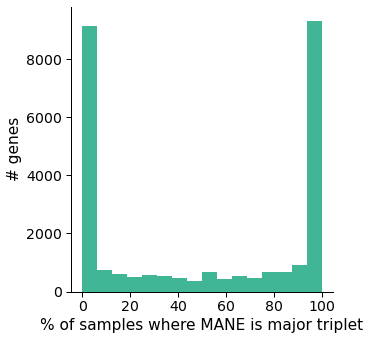

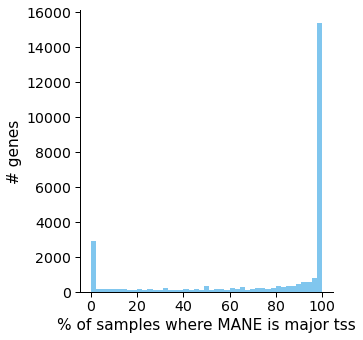

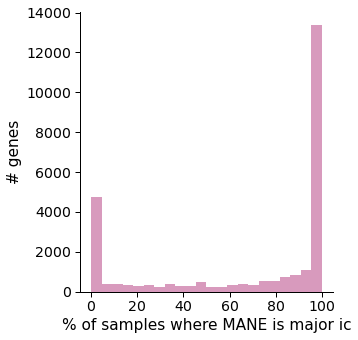

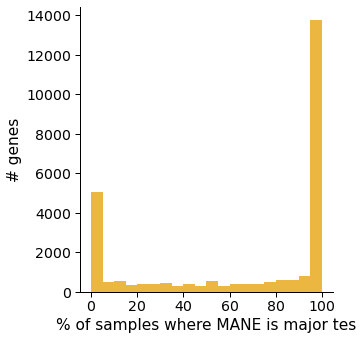

In [167]:
df = plot_major_principal_feat_counts(sg, opref='figures/', obs_col=obs_col, gene_subset=inds)

In [116]:
gnames = ['MEF2C', 'COL1A1']
temp.loc[temp.gname.isin(gnames)]

,gname,gid_stable,n_sample_major_iso,n_sample_not_major_iso,n_expressed_samples,prop_major_samples
8842,COL1A1,ENSG00000108821,0,29,29,0.0
16140,MEF2C,ENSG00000081189,0,42,42,0.0
